In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

# Get the all_hotels dataset from this link:  https://drive.google.com/file/d/1hdC7zXODlanrQHRrqSNAoLPU5XJwmapb/view?usp=sharing

all_hotels = pd.read_csv("/content/gdrive/MyDrive/AI Sem 5/AI Project/Datasets/train_set.csv", names=["image_id", "hotel_id", "image_url", "image_source", "upload_timestamp"])
# Displaying the dataset
all_hotels.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp
0,3485,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23
1,3486,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23
2,3663,73224,https://traffickcam.com/images/2016/10/2015091...,traffickcam,9/17/15 19:33
3,2586939,86350,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 19:12
4,2586950,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23


In [ ]:
# Get the hotels dataset from this link:  https://drive.google.com/file/d/1GIvgQtYeXapDIGpfdd_czVrIcVfN_xy1/view?usp=sharing

hotels = pd.read_csv('/content/gdrive/MyDrive/AI/datasets/170k/hotels_subset_170k_without_missing_final.csv')

In [ ]:
hotels_id_dist = pd.DataFrame(hotels['hotel_id'].value_counts()).reset_index()

In [ ]:
hotels_id_dist.rename(columns={'index': 'hotel_id', 'hotel_id': 'count'}, inplace=True)

In [ ]:
hotels_id_dist

,hotel_id,count
0,6798,328
1,1240,258
2,873,244
3,5201,166
4,6611,165
...,...,...
15315,12080,1
15316,12068,1
15317,12064,1
15318,26906,1


# **Difficult Dataset**

To create the difficult dataset, we first thought of taking hotels which only have one image per hotel. However, we decided against this because we weren’t able to create the test and validation datasets using stratified sampling. This was because stratified sampling is unable to split the dataset proportionately if there is only one image per hotel. 
To do the 80-10-10 (train-validation-test) split, we needed a minimum of 10 images per hotel. 

Hence, we decided to make the dataset using hotels which have 10 images each.


In [ ]:
difficult_dataset_dist = hotels_id_dist[hotels_id_dist['count'] == 10]

In [ ]:
difficult_dataset_dist

,hotel_id,count
4873,5189,10
4874,8325,10
4875,6458,10
4876,81853,10
4877,4138,10
...,...,...
5197,1024,10
5198,85511,10
5199,4387,10
5200,1412,10


In [ ]:
difficult_dataset_dist = difficult_dataset_dist['hotel_id']

In [ ]:
difficult_dataset_dist = list(difficult_dataset_dist)

In [ ]:
difficult_dataset_hotels = pd.DataFrame(columns=['image_id','hotel_id','image_url','image_source','upload_timestamp', 'serial_number'])

In [ ]:
for i in range(0, len(hotels['hotel_id'])):
  try:
    if hotels['hotel_id'][i] in difficult_hotels_dist:
      difficult_dataset_hotels.loc[len(difficult_dataset_hotels)] = [hotels['image_id'][i], hotels['hotel_id'][i],
                                               hotels['image_url'][i], hotels['image_source'][i],
                                               hotels['upload_timestamp'][i], hotels['serial_number'][i]] 
  except:
    print(i)

In [ ]:
difficult_dataset_hotels

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number
0,2586939,86350,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 19:12,3
1,2587023,86350,https://traffickcam.com/images/2017/2/20160126...,traffickcam,1/26/16 0:36,10
2,2587024,86350,https://traffickcam.com/images/2017/2/20160126...,traffickcam,1/26/16 0:36,11
3,2587026,86350,https://traffickcam.com/images/2017/2/20160126...,traffickcam,1/26/16 0:36,12
4,2587554,76756,https://traffickcam.com/images/2017/3/20160218...,traffickcam,2/18/16 4:40,32
...,...,...,...,...,...,...
3285,7412755,7664,https://i.travelapi.com/hotels/3000000/2810000...,travel_website,2019-12-20 10:55:27,169734
3286,7412756,7664,https://i.travelapi.com/hotels/3000000/2810000...,travel_website,2019-12-20 10:55:27,169735
3287,7412757,7664,https://i.travelapi.com/hotels/3000000/2810000...,travel_website,2019-12-20 10:55:27,169736
3288,7412758,7664,https://i.travelapi.com/hotels/3000000/2810000...,travel_website,2019-12-20 10:55:27,169737


In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
difficult_dataset_hotels['new_hotel_id'] = label_encoder.fit_transform(difficult_dataset_hotels['hotel_id'])
difficult_dataset_hotels.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number,new_hotel_id
0,2586939,86350,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 19:12,3,302
1,2587023,86350,https://traffickcam.com/images/2017/2/20160126...,traffickcam,1/26/16 0:36,10,302
2,2587024,86350,https://traffickcam.com/images/2017/2/20160126...,traffickcam,1/26/16 0:36,11,302
3,2587026,86350,https://traffickcam.com/images/2017/2/20160126...,traffickcam,1/26/16 0:36,12,302
4,2587554,76756,https://traffickcam.com/images/2017/3/20160218...,traffickcam,2/18/16 4:40,32,277


In [ ]:
difficult_dataset_hotels_20perc = difficult_dataset_hotels.groupby('hotel_id', group_keys=False).apply(lambda x: x.sample(frac=0.2))

In [ ]:
difficult_dataset_hotels_20perc

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number,new_hotel_id
1258,7064758,405,https://i.travelapi.com/hotels/2000000/1500000...,travel_website,2019-12-19 20:50:26,44839,0
1264,7064764,405,https://i.travelapi.com/hotels/2000000/1500000...,travel_website,2019-12-19 20:50:26,44845,0
1266,7034288,502,https://i.travelapi.com/hotels/2000000/1810000...,travel_website,2019-12-19 20:02:30,47016,1
1267,7034289,502,https://i.travelapi.com/hotels/2000000/1810000...,travel_website,2019-12-19 20:02:30,47017,1
1277,8557791,523,https://i.travelapi.com/hotels/1000000/10000/3...,travel_website,2019-12-22 10:05:47,47303,2
...,...,...,...,...,...,...,...
860,3893274,203768,https://traffickcam.com/images/2018/10/2017092...,traffickcam,9/27/17 20:56,32129,326
1112,3934986,204289,https://traffickcam.com/images/2019/5/20180418...,traffickcam,4/18/18 20:59,39792,327
617,3841209,204289,https://traffickcam.com/images/2018/5/20170403...,traffickcam,4/3/17 5:24,22748,327
1000,3916653,207689,https://traffickcam.com/images/2019/2/20180118...,traffickcam,1/18/18 20:45,36406,328


In [ ]:
difficult_dataset_hotels_validation = difficult_dataset_hotels_20perc.groupby('hotel_id', group_keys=False).apply(lambda x: x.sample(frac=0.5))

In [ ]:
difficult_dataset_hotels_validation

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number,new_hotel_id
1258,7064758,405,https://i.travelapi.com/hotels/2000000/1500000...,travel_website,2019-12-19 20:50:26,44839,0
1267,7034289,502,https://i.travelapi.com/hotels/2000000/1810000...,travel_website,2019-12-19 20:02:30,47017,1
1275,8557789,523,https://i.travelapi.com/hotels/1000000/10000/3...,travel_website,2019-12-22 10:05:47,47301,2
1282,6788395,569,https://i.travelapi.com/hotels/2000000/1190000...,travel_website,2019-12-19 13:42:25,48186,3
1296,6790357,581,https://i.travelapi.com/hotels/2000000/1100000...,travel_website,2019-12-19 13:45:34,48324,4
...,...,...,...,...,...,...,...
559,2775397,144729,https://traffickcam.com/images/2018/4/20170311...,traffickcam,3/11/17 18:47,20851,324
820,3888430,203103,https://traffickcam.com/images/2018/10/2017090...,traffickcam,9/5/17 19:53,31186,325
917,3901259,203768,https://traffickcam.com/images/2018/11/2017102...,traffickcam,10/29/17 3:37,33542,326
1112,3934986,204289,https://traffickcam.com/images/2019/5/20180418...,traffickcam,4/18/18 20:59,39792,327


In [ ]:
difficult_dataset_hotels_test = pd.DataFrame(columns=['image_id','hotel_id','image_url','image_source','upload_timestamp', 'serial_number', 'new_hotel_id'])

In [ ]:
for i in range(0, len(difficult_dataset_hotels_20perc['hotel_id'])):
    if difficult_dataset_hotels_20perc.iloc[i]['serial_number'] not in list(difficult_dataset_hotels_validation['serial_number']):
      difficult_dataset_hotels_test.loc[len(difficult_dataset_hotels_test)] = [difficult_dataset_hotels_20perc.iloc[i]['image_id'], difficult_dataset_hotels_20perc.iloc[i]['hotel_id'],
                                                        difficult_dataset_hotels_20perc.iloc[i]['image_url'], difficult_dataset_hotels_20perc.iloc[i]['image_source'],
                                                        difficult_dataset_hotels_20perc.iloc[i]['upload_timestamp'], difficult_dataset_hotels_20perc.iloc[i]['serial_number'],
                                                        difficult_dataset_hotels_20perc.iloc[i]['new_hotel_id']]

In [ ]:
difficult_dataset_hotels_test

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number,new_hotel_id
0,7064764,405,https://i.travelapi.com/hotels/2000000/1500000...,travel_website,2019-12-19 20:50:26,44845,0
1,7034288,502,https://i.travelapi.com/hotels/2000000/1810000...,travel_website,2019-12-19 20:02:30,47016,1
2,8557791,523,https://i.travelapi.com/hotels/1000000/10000/3...,travel_website,2019-12-22 10:05:47,47303,2
3,6788398,569,https://i.travelapi.com/hotels/2000000/1190000...,travel_website,2019-12-19 13:42:25,48189,3
4,6790356,581,https://i.travelapi.com/hotels/2000000/1100000...,travel_website,2019-12-19 13:45:34,48323,4
...,...,...,...,...,...,...,...
324,2681304,144729,https://traffickcam.com/images/2017/13/2016122...,traffickcam,12/29/16 6:38,16861,324
325,3931017,203103,https://traffickcam.com/images/2019/5/20180401...,traffickcam,4/1/18 2:40,39044,325
326,3893274,203768,https://traffickcam.com/images/2018/10/2017092...,traffickcam,9/27/17 20:56,32129,326
327,3841209,204289,https://traffickcam.com/images/2018/5/20170403...,traffickcam,4/3/17 5:24,22748,327


In [ ]:
difficult_dataset_hotels_train = pd.DataFrame(columns=['image_id','hotel_id','image_url','image_source','upload_timestamp', 'serial_number', 'new_hotel_id'])

In [ ]:
for i in range(0, len(difficult_dataset_hotels['hotel_id'])):
    if difficult_dataset_hotels.iloc[i]['serial_number'] not in list(difficult_dataset_hotels_20perc['serial_number']):
      difficult_dataset_hotels_train.loc[len(difficult_dataset_hotels_train)] = [difficult_dataset_hotels.iloc[i]['image_id'], difficult_dataset_hotels.iloc[i]['hotel_id'],
                                                           difficult_dataset_hotels.iloc[i]['image_url'], difficult_dataset_hotels.iloc[i]['image_source'],
                                                           difficult_dataset_hotels.iloc[i]['upload_timestamp'], difficult_dataset_hotels.iloc[i]['serial_number'],
                                                           difficult_dataset_hotels.iloc[i]['new_hotel_id']]

In [ ]:
difficult_dataset_hotels_train

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number,new_hotel_id
0,2586939,86350,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 19:12,3,302
1,2587023,86350,https://traffickcam.com/images/2017/2/20160126...,traffickcam,1/26/16 0:36,10,302
2,2587026,86350,https://traffickcam.com/images/2017/2/20160126...,traffickcam,1/26/16 0:36,12,302
3,2587554,76756,https://traffickcam.com/images/2017/3/20160218...,traffickcam,2/18/16 4:40,32,277
4,2587555,76756,https://traffickcam.com/images/2017/3/20160218...,traffickcam,2/18/16 4:42,33,277
...,...,...,...,...,...,...,...
2627,7412754,7664,https://i.travelapi.com/hotels/3000000/2810000...,travel_website,2019-12-20 10:55:27,169733,210
2628,7412755,7664,https://i.travelapi.com/hotels/3000000/2810000...,travel_website,2019-12-20 10:55:27,169734,210
2629,7412756,7664,https://i.travelapi.com/hotels/3000000/2810000...,travel_website,2019-12-20 10:55:27,169735,210
2630,7412758,7664,https://i.travelapi.com/hotels/3000000/2810000...,travel_website,2019-12-20 10:55:27,169737,210


Note: In case you do not want to perform all this preprocessing to get the datasets, we have saved these datasets in csvs for ready use.
The links are as follows:

*   difficult_dataset_hotels: https://drive.google.com/file/d/1t1-r-rB-R5HE-WVmIAan3cLJnrV8Uy3r/view?usp=sharing
*   difficult_dataset_hotels_train: https://drive.google.com/file/d/1XRaxZPpEg6_ElJl-mbU4FkBKm9-6pkcl/view?usp=sharing
*   difficult_dataset_hotels_test: https://drive.google.com/file/d/1_3d7Rfr3wzXOHJt_-MyPP8lvn016W-n-/view?usp=sharing
*   difficult_dataset_hotels_validation: https://drive.google.com/file/d/1OdxNh91bqeylhZexvnGnAGJIKOASCdtE/view?usp=sharing

In [ ]:
import urllib.request

# Loads image from a url
def loadImage(URL, image_num):
  with urllib.request.urlopen(URL) as url:
    with open(f'/content/gdrive/MyDrive/AI Sem 5/AI Project/difficult Dataset Hotel Images/img{image_num}.jpg', 'wb') as f:
      f.write(url.read())

Uploading images in difficult_dataset_hotels to drive.
The i values printed in the exception correspond to those images whose links have become disfunctional

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from keras.preprocessing.image import load_img

for i in range(len(difficult_dataset_hotels['image_url'])):
    try: 
      image_url = difficult_dataset_hotels['image_url'][i]
      serial_number = difficult_dataset_hotels['serial_number'][i]
      loadImage(image_url, serial_number)
    except:
      print(i)

1342
1346
1545
1550
1625
1628
1629
1631
1811
1815
1818
1890
1918
1922
1924
1925
1940
1942
1975
2379
2398
2544


To remove the missing images from our three datasets, we are first mapping the i value to the serial number and storing the serial numbers in a list.
We are also storing the class corresponding to the serial number in the train, validation and test lists if they belong there. 

In [ ]:
missing_images_i = [1342,1346,1545,1550,1625,1628,1629,1631,1811,1815,1818,1890,1918,1922,1924,1925,1940,1942,1975,2379,2398,2544]
missing_images_serial_number = []
missing_images_class = []
missing_images_class_train = []
missing_images_class_test = []
missing_images_class_validation = []

In [ ]:
for i in missing_images_i:
  serial_number = difficult_dataset_hotels['serial_number'][i]
  missing_images_serial_number.append(serial_number)
  if serial_number in list(difficult_dataset_hotels_train['serial_number']):
    missing_images_class_train.append(difficult_dataset_hotels['new_hotel_id'][i])
  elif serial_number in list(difficult_dataset_hotels_test['serial_number']):
    missing_images_class_test.append(difficult_dataset_hotels['new_hotel_id'][i])
  elif serial_number in list(difficult_dataset_hotels_validation['serial_number']):
    missing_images_class_validation.append(difficult_dataset_hotels['new_hotel_id'][i])
  
  missing_images_class.append(difficult_dataset_hotels['new_hotel_id'][i])

# **We will apply our three models to the difficult dataset**

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
train_imgs = []
for i in range(0, len(difficult_dataset_hotels_train['hotel_id'])):
  serial_number = difficult_dataset_hotels_train['serial_number'][i]
  if serial_number in missing_images_serial_number:
    continue
  image = img_to_array(load_img(f'/content/gdrive/MyDrive/AI Sem 5/AI Project/difficult Dataset Hotel Images/img{serial_number}.jpg', target_size=(224, 224)))
  image = preprocess_input(image)
  train_imgs.append(image)

  if (i % 1000 == 0):
    print(i)

0
1000
2000


In [ ]:
validation_imgs = []
for i in range(0, len(difficult_dataset_hotels_validation['hotel_id'])):
  serial_number = difficult_dataset_hotels_validation.iloc[i]['serial_number']
  if serial_number in missing_images_serial_number:
    continue
  image = img_to_array(load_img(f'/content/gdrive/MyDrive/AI Sem 5/AI Project/difficult Dataset Hotel Images/img{serial_number}.jpg', target_size=(224, 224)))
  image = preprocess_input(image)
  validation_imgs.append(image)
  
  if (i % 100 == 0):
    print(i)

0
100
200
300


In [ ]:
test_imgs = []
for i in range(0, len(difficult_dataset_hotels_test['hotel_id'])):
  serial_number = difficult_dataset_hotels_test['serial_number'][i]
  if serial_number in missing_images_serial_number:
    continue
  image = img_to_array(load_img(f'/content/gdrive/MyDrive/AI Sem 5/AI Project/difficult Dataset Hotel Images/img{serial_number}.jpg', target_size=(224, 224)))
  image = preprocess_input(image)
  test_imgs.append(image)
  
  if (i % 100 == 0):
    print(i)

0
100
200
300


In [ ]:
import numpy as np

train_imgs = np.array(train_imgs)
validation_imgs = np.array(validation_imgs)
test_imgs = np.array(test_imgs)

In [ ]:
train_labels = list(difficult_dataset_hotels_train['new_hotel_id'])
validation_labels = list(difficult_dataset_hotels_validation['new_hotel_id'])
test_labels = list(difficult_dataset_hotels_test['new_hotel_id'])

In [ ]:
# Removing the class corresponding to the missing images from the
# labels list of train, test and validation

for missing_class in missing_images_class_train:
  train_labels.remove(missing_class)

for missing_class in missing_images_class_validation:
  validation_labels.remove(missing_class)

for missing_class in missing_images_class_test:
  test_labels.remove(missing_class)

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
validation_labels = to_categorical(validation_labels)

The difficult dataset has 329 classes.

In [ ]:
train_labels.shape

(2612, 329)

In [ ]:
test_labels.shape

(328, 329)

In [ ]:
validation_labels.shape

(328, 329)

# **Plotting Graph**

In [ ]:
from matplotlib import pyplot

def summarize_model(history):
	# plot loss during training
  pyplot.figure(figsize=(8,6))
  pyplot.subplot(211)
  pyplot.title('Loss')
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  # plot accuracy during training
  pyplot.subplot(212)
  pyplot.title('Accuracy')
  pyplot.plot(history.history['accuracy'], label='train')
  pyplot.plot(history.history['val_accuracy'], label='test')
  pyplot.legend()
  pyplot.show()

# **Model 1**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras import optimizers
import keras

model_1 = Sequential()
input_t = Input(shape = (224,224,3))
pretrained_model= ResNet50(include_top=False,
                           input_tensor=input_t, 
                   pooling='avg',classes= 50,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False
model_1.add(pretrained_model)
model_1.add(Flatten())
model_1.add(Dense(512, activation='relu', input_dim = (224,224,3)))
output = model_1.add(Dense(329, activation='softmax'))
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dense_4 (Dense)             (None, 329)               168777    
                                                                 
Total params: 24,805,577
Trainable params: 1,217,865
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history_difficult_1_10 = model_1.fit(x = train_imgs, y = train_labels, validation_data=(validation_imgs, validation_labels), steps_per_epoch=10, epochs=10, verbose=1)

Epoch 1/10
10/10 [==============================] - 43s 3s/step - loss: 5.9696 - accuracy: 0.0027 - val_loss: 5.7228 - val_accuracy: 0.0030
Epoch 2/10
10/10 [==============================] - 16s 2s/step - loss: 5.4033 - accuracy: 0.0475 - val_loss: 5.5749 - val_accuracy: 0.0244
Epoch 3/10
10/10 [==============================] - 17s 2s/step - loss: 4.8352 - accuracy: 0.1351 - val_loss: 5.3322 - val_accuracy: 0.0518
Epoch 4/10
10/10 [==============================] - 17s 2s/step - loss: 4.1745 - accuracy: 0.2580 - val_loss: 5.1511 - val_accuracy: 0.0762
Epoch 5/10
10/10 [==============================] - 17s 2s/step - loss: 3.5599 - accuracy: 0.3687 - val_loss: 4.9291 - val_accuracy: 0.1067
Epoch 6/10
10/10 [==============================] - 17s 2s/step - loss: 2.9616 - accuracy: 0.4893 - val_loss: 4.7924 - val_accuracy: 0.1372
Epoch 7/10
10/10 [==============================] - 17s 2s/step - loss: 2.4341 - accuracy: 0.6060 - val_loss: 4.6729 - val_accuracy: 0.1372
Epoch 8/10
10/10 [==

In [ ]:
testLoss, testAccuracy = model_1.evaluate(test_imgs, test_labels)

11/11 [==============================] - 2s 199ms/step - loss: 4.2746 - accuracy: 0.2500


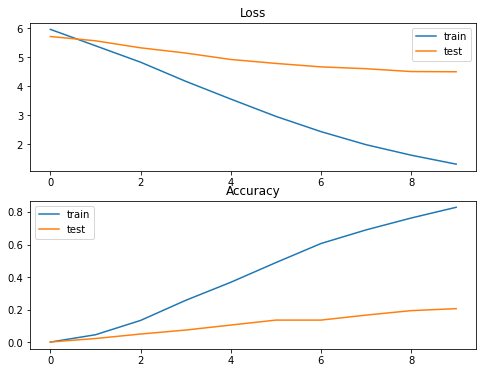

In [ ]:
summarize_model(history_difficult_1_10)

In [ ]:
history_difficult_1_20 = model_1.fit(x = train_imgs, y = train_labels, validation_data=(validation_imgs, validation_labels), steps_per_epoch=10, epochs=20, verbose=1)

Epoch 1/20
10/10 [==============================] - 17s 2s/step - loss: 1.0380 - accuracy: 0.8783 - val_loss: 4.4776 - val_accuracy: 0.2043
Epoch 2/20
10/10 [==============================] - 16s 2s/step - loss: 0.8118 - accuracy: 0.9230 - val_loss: 4.4513 - val_accuracy: 0.2256
Epoch 3/20
10/10 [==============================] - 17s 2s/step - loss: 0.6459 - accuracy: 0.9475 - val_loss: 4.4705 - val_accuracy: 0.2104
Epoch 4/20
10/10 [==============================] - 17s 2s/step - loss: 0.5088 - accuracy: 0.9675 - val_loss: 4.4701 - val_accuracy: 0.2226
Epoch 5/20
10/10 [==============================] - 17s 2s/step - loss: 0.4012 - accuracy: 0.9770 - val_loss: 4.4828 - val_accuracy: 0.2256
Epoch 6/20
10/10 [==============================] - 17s 2s/step - loss: 0.3147 - accuracy: 0.9870 - val_loss: 4.5058 - val_accuracy: 0.2378
Epoch 7/20
10/10 [==============================] - 17s 2s/step - loss: 0.2533 - accuracy: 0.9885 - val_loss: 4.5319 - val_accuracy: 0.2256
Epoch 8/20
10/10 [==

In [ ]:
testLoss, testAccuracy = model_1.evaluate(test_imgs, test_labels)

11/11 [==============================] - 2s 205ms/step - loss: 4.3774 - accuracy: 0.2957


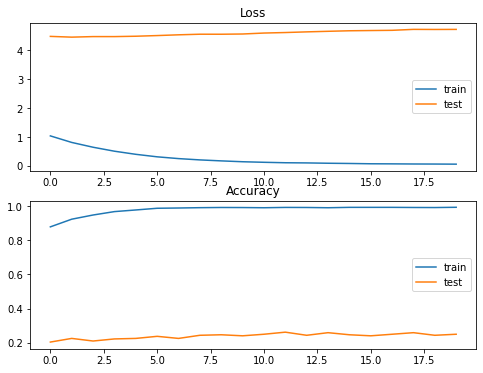

In [ ]:
summarize_model(history_difficult_1_20)

In [ ]:
history_difficult_1_50 = model_1.fit(x = train_imgs, y = train_labels, validation_data=(validation_imgs, validation_labels), steps_per_epoch=10, epochs=50, verbose=1)

Epoch 1/50
10/10 [==============================] - 22s 2s/step - loss: 5.9649 - accuracy: 0.0065 - val_loss: 5.7220 - val_accuracy: 0.0183
Epoch 2/50
10/10 [==============================] - 17s 2s/step - loss: 5.3785 - accuracy: 0.0632 - val_loss: 5.5583 - val_accuracy: 0.0274
Epoch 3/50
10/10 [==============================] - 17s 2s/step - loss: 4.7993 - accuracy: 0.1413 - val_loss: 5.2649 - val_accuracy: 0.0610
Epoch 4/50
10/10 [==============================] - 17s 2s/step - loss: 4.1244 - accuracy: 0.2653 - val_loss: 5.0501 - val_accuracy: 0.1006
Epoch 5/50
10/10 [==============================] - 17s 2s/step - loss: 3.4967 - accuracy: 0.3940 - val_loss: 4.8600 - val_accuracy: 0.1037
Epoch 6/50
10/10 [==============================] - 17s 2s/step - loss: 2.9255 - accuracy: 0.4981 - val_loss: 4.7050 - val_accuracy: 0.1524
Epoch 7/50
10/10 [==============================] - 17s 2s/step - loss: 2.4192 - accuracy: 0.5915 - val_loss: 4.6234 - val_accuracy: 0.1402
Epoch 8/50
10/10 [==

In [ ]:
testLoss, testAccuracy = model_1.evaluate(test_imgs, test_labels)

11/11 [==============================] - 2s 204ms/step - loss: 4.5336 - accuracy: 0.2988


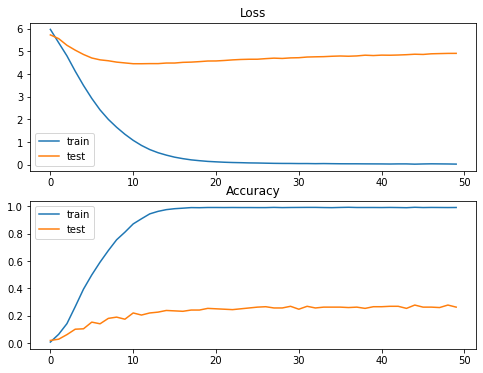

In [ ]:
summarize_model(history_difficult_1_50)

# **Model 2**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras import optimizers
import keras

model_2 = Sequential()
input_t = Input(shape = (224,224,3))
pretrained_model= ResNet50(include_top=False,
                           input_tensor=input_t, 
                   pooling='avg',classes= 50,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False
model_2.add(pretrained_model)
model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dense(1024, activation='relu', input_dim = (224,224,3)))
output = model_2.add(Dense(329, activation='softmax'))
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               1049088   
                                                                 
 dense_6 (Dense)             (None, 1024)              525312    
                                                                 
 dense_7 (Dense)             (None, 329)               337225    
                                                                 
Total params: 25,499,337
Trainable params: 1,911,625
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history_difficult_2_10 = model_2.fit(x = train_imgs, y = train_labels, validation_data=(validation_imgs, validation_labels), steps_per_epoch=10, epochs=10, verbose=1)

Epoch 1/10
10/10 [==============================] - 44s 3s/step - loss: 5.9280 - accuracy: 0.0046 - val_loss: 5.7404 - val_accuracy: 0.0030
Epoch 2/10
10/10 [==============================] - 16s 2s/step - loss: 5.5152 - accuracy: 0.0417 - val_loss: 5.5175 - val_accuracy: 0.0183
Epoch 3/10
10/10 [==============================] - 16s 2s/step - loss: 4.8689 - accuracy: 0.1175 - val_loss: 5.2199 - val_accuracy: 0.0488
Epoch 4/10
10/10 [==============================] - 17s 2s/step - loss: 4.1238 - accuracy: 0.2163 - val_loss: 4.9666 - val_accuracy: 0.0976
Epoch 5/10
10/10 [==============================] - 17s 2s/step - loss: 3.3270 - accuracy: 0.3583 - val_loss: 4.8825 - val_accuracy: 0.1006
Epoch 6/10
10/10 [==============================] - 17s 2s/step - loss: 2.6800 - accuracy: 0.4537 - val_loss: 4.8311 - val_accuracy: 0.1280
Epoch 7/10
10/10 [==============================] - 17s 2s/step - loss: 2.0581 - accuracy: 0.6022 - val_loss: 4.6855 - val_accuracy: 0.1646
Epoch 8/10
10/10 [==

In [ ]:
testLoss, testAccuracy = model_2.evaluate(test_imgs, test_labels)

11/11 [==============================] - 2s 203ms/step - loss: 4.5475 - accuracy: 0.2470


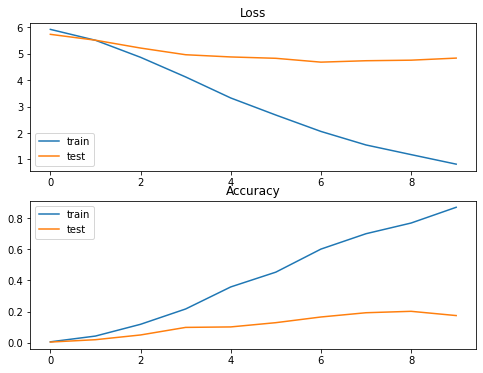

In [ ]:
summarize_model(history_difficult_2_10)

In [ ]:
history_2_20 = model_2.fit(x = train_imgs, y = train_labels, validation_data=(validation_imgs, validation_labels), steps_per_epoch=10, epochs=20, verbose=1)

Epoch 1/20
10/10 [==============================] - 17s 2s/step - loss: 0.5617 - accuracy: 0.9215 - val_loss: 4.9140 - val_accuracy: 0.2287
Epoch 2/20
10/10 [==============================] - 17s 2s/step - loss: 0.3876 - accuracy: 0.9548 - val_loss: 5.0072 - val_accuracy: 0.2043
Epoch 3/20
10/10 [==============================] - 17s 2s/step - loss: 0.2574 - accuracy: 0.9793 - val_loss: 5.0552 - val_accuracy: 0.2073
Epoch 4/20
10/10 [==============================] - 17s 2s/step - loss: 0.1728 - accuracy: 0.9847 - val_loss: 5.2037 - val_accuracy: 0.2104
Epoch 5/20
10/10 [==============================] - 17s 2s/step - loss: 0.1209 - accuracy: 0.9874 - val_loss: 5.2928 - val_accuracy: 0.2226
Epoch 6/20
10/10 [==============================] - 17s 2s/step - loss: 0.1077 - accuracy: 0.9866 - val_loss: 5.3155 - val_accuracy: 0.2104
Epoch 7/20
10/10 [==============================] - 17s 2s/step - loss: 0.0929 - accuracy: 0.9889 - val_loss: 5.3471 - val_accuracy: 0.2104
Epoch 8/20
10/10 [==

In [ ]:
testLoss, testAccuracy = model_2.evaluate(test_imgs, test_labels)

11/11 [==============================] - 2s 211ms/step - loss: 5.1570 - accuracy: 0.2835


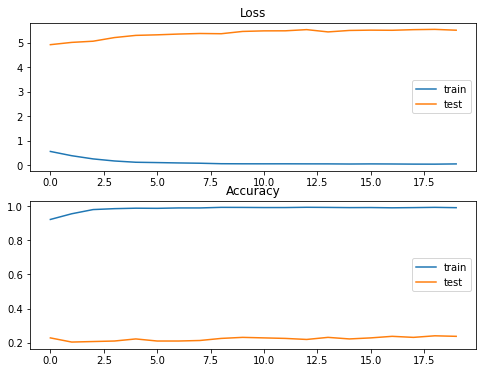

In [ ]:
summarize_model(history_2_20)